In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [3]:
df = pd.read_csv('assets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df = df.drop(['age' , 'sex', 'children' , 'smoker' , 'region'], axis=1)

In [7]:
df.head()

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520


In [8]:
df.describe()

,bmi,charges
count,1338.000000,1338.000000
mean,30.663397,13270.422265
std,6.098187,12110.011237
min,15.960000,1121.873900
25%,26.296250,4740.287150
50%,30.400000,9382.033000
75%,34.693750,16639.912515
max,53.130000,63770.428010


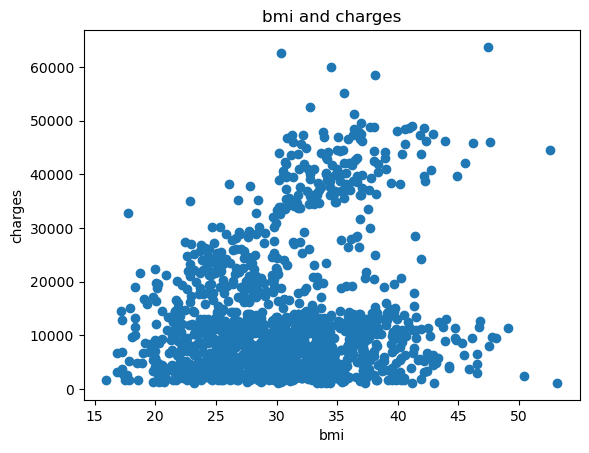

In [9]:
plt.scatter(df['bmi'], df['charges'])
plt.xlabel("bmi")
plt.ylabel("charges")
plt.title("bmi and charges")
plt.show()

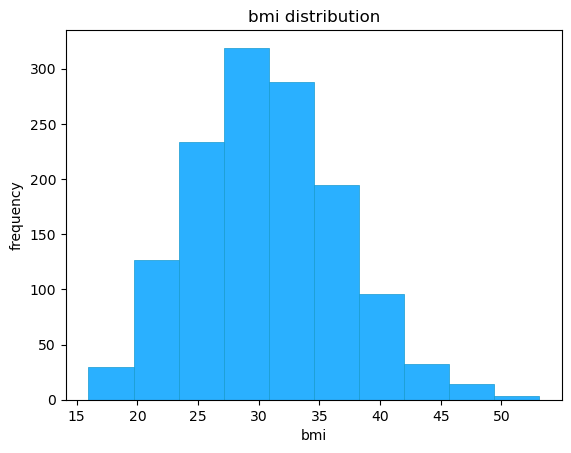

In [10]:
plt.hist(df["bmi"], facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.xlabel("bmi")
plt.ylabel("frequency")
plt.title("bmi distribution")
plt.show()

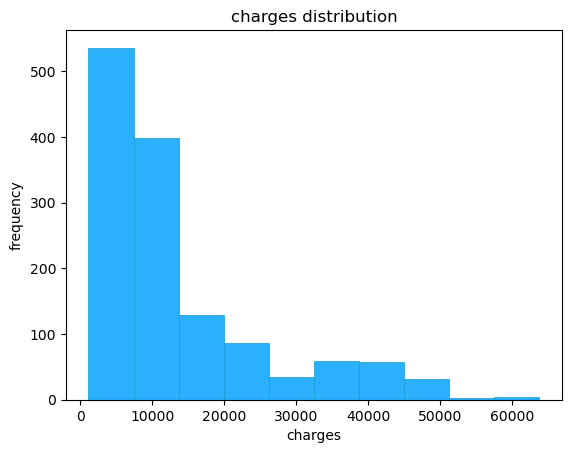

In [11]:
plt.hist(df["charges"], facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.xlabel("charges")
plt.ylabel("frequency")
plt.title("charges distribution")
plt.show()

In [12]:
corr = df.corr()
corr

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


In [13]:
x = df["bmi"].values
x = x.reshape(-1, 1)

In [14]:
y = df["charges"].values
y = y.reshape(-1, 1)

In [15]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [16]:
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size=0.3)

In [17]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(x_test)


In [20]:
mse = mean_squared_error(y_test,y_pred)


In [21]:
r2 = r2_score(y_test,y_pred)


In [22]:
r2

0.03382852533822622

In [23]:
mse

138430439.83833447

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

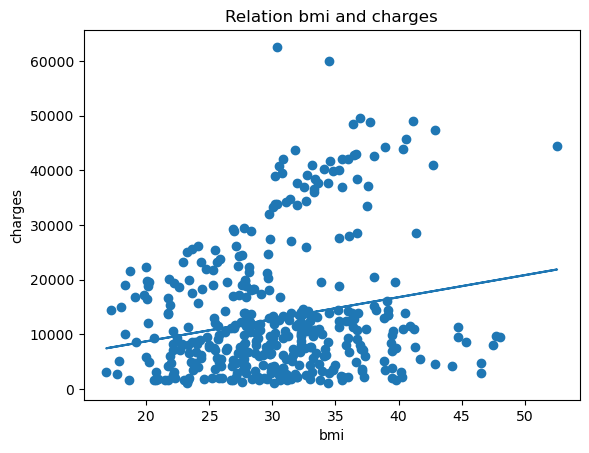

In [24]:
plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred)
plt.xlabel("bmi")
plt.ylabel("charges")
plt.title("Relation bmi and charges")
plt.plot